<font size="+5">#08. Cluster Analysis con k-Means</font>

# Cargar Datos

> - Simplemente, copiamos y pegamos las siguientes líneas de código para cargar los datos.
> - La tabla contiene **estadísticas sobre Coches** (columnas).
> - Para distintas **Marcas/Modelos de coche** (filas).

```python
import seaborn as sns

df = sns.load_dataset(name='mpg', index_col='name')
df.sample(10)
```

In [28]:
import seaborn as sns

df = sns.load_dataset(name='mpg', index_col='name')
df.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
name,,,,,,,,
amc hornet sportabout (sw),18.0,6,258.0,110.0,2962,13.5,71,usa
pontiac ventura sj,18.5,6,250.0,110.0,3645,16.2,76,usa
chevrolet cavalier,28.0,4,112.0,88.0,2605,19.6,82,usa
ford f250,10.0,8,360.0,215.0,4615,14.0,70,usa
toyota corolla 1200,31.0,4,71.0,65.0,1773,19.0,71,japan
chevrolet woody,24.5,4,98.0,60.0,2164,22.1,76,usa
honda civic,24.0,4,120.0,97.0,2489,15.0,74,japan
amc matador,15.0,6,258.0,110.0,3730,19.0,75,usa
chevrolet monte carlo landau,19.2,8,305.0,145.0,3425,13.2,78,usa


In [29]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

# Seleccionar 2 Variables para el Análisis de Clúster

> En este caso **ambas variables son explicativas**. La variable que queremos predecir no se la damos al modelo. Sino que tratará de adivinarla en base a cómo de cerca estén los puntos.

<AxesSubplot:xlabel='mpg', ylabel='acceleration'>

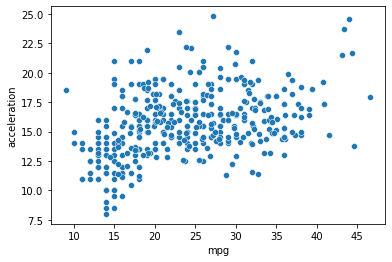

In [30]:
sns.scatterplot(x='mpg', y='acceleration', data=df)

# Scatterplot con las Variables

> Deberíamos observar en la gráfica cuántos posibles grupos podríamos hacer para agrupar los puntos.

# Transformación de los Datos

> Deberíamos valorar si tenemos que realizar algunos cambios a los datos para que el modelo de k-Means se compute adecuadamente y pueda comparar ambas variables.
>
> Las variables originales pueden tener un rango de valores diferente.
>
> Imaginemos que tenemos dos variables:
>
> - Peso (en kilogramos)
> - Altura (en metros)
>
> **Es lo mismo** incrementar 1 kilogramo de peso, que incrementar 1 metro de altura?
> 
> - Hazte las mismas preguntas con tus variables.

In [31]:
explanatory = df[['mpg','acceleration']]

In [32]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
scaler = MinMaxScaler()

In [34]:
scaler.__dict__

{'feature_range': (0, 1), 'copy': True, 'clip': False}

In [35]:
scaler.fit(explanatory)

MinMaxScaler()

In [36]:
scaler.__dict__

{'feature_range': (0, 1),
 'copy': True,
 'clip': False,
 'feature_names_in_': array(['mpg', 'acceleration'], dtype=object),
 'n_features_in_': 2,
 'n_samples_seen_': 398,
 'scale_': array([0.02659574, 0.05952381]),
 'min_': array([-0.2393617 , -0.47619048]),
 'data_min_': array([9., 8.]),
 'data_max_': array([46.6, 24.8]),
 'data_range_': array([37.6, 16.8])}

In [23]:
import pandas as pd

In [41]:
dfnorm.columns

Index(['mpg', 'acceleration'], dtype='object')

In [43]:
df.index

Index(['chevrolet chevelle malibu', 'buick skylark 320', 'plymouth satellite',
       'amc rebel sst', 'ford torino', 'ford galaxie 500', 'chevrolet impala',
       'plymouth fury iii', 'pontiac catalina', 'amc ambassador dpl',
       ...
       'chrysler lebaron medallion', 'ford granada l', 'toyota celica gt',
       'dodge charger 2.2', 'chevrolet camaro', 'ford mustang gl', 'vw pickup',
       'dodge rampage', 'ford ranger', 'chevy s-10'],
      dtype='object', name='name', length=398)

In [50]:
dfnorm = pd.DataFrame(scaler.transform(explanatory), columns=explanatory.columns, index=df.index)

In [54]:
explanatory

,mpg,acceleration
name,,
chevrolet chevelle malibu,18.0,12.0
buick skylark 320,15.0,11.5
plymouth satellite,18.0,11.0
amc rebel sst,16.0,12.0
ford torino,17.0,10.5
...,...,...
ford mustang gl,27.0,15.6
vw pickup,44.0,24.6
dodge rampage,32.0,11.6


In [52]:
dfnorm

,mpg,acceleration
name,,
chevrolet chevelle malibu,0.239362,0.238095
buick skylark 320,0.159574,0.208333
plymouth satellite,0.239362,0.178571
amc rebel sst,0.186170,0.238095
ford torino,0.212766,0.148810
...,...,...
ford mustang gl,0.478723,0.452381
vw pickup,0.930851,0.988095
dodge rampage,0.611702,0.214286


# Entrenar Modelo `KMeans()`

> Podremos predecir 1, 2, 3,..., k grupos. Tantos como queramos. Sin embargo, seleccionaremos `n_cluster = 3` para no complicarnos la vida.
> 1. **Necesidad:** Entrenar Modelo
> 2. **Solución: Función** `fit()`

In [9]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
model.fit(X=explanatory)

KMeans(n_clusters=3)

# Realizar Predicciones

> - `model.predict()`

In [10]:
grupos = model.predict(X=explanatory)

# Visualizar Modelo

> - Scatterplot con puntos coloreados según el grupo al que pertenece cada observación: `hue = model.labels_`
> - Añade otra capa de puntos, los cuales indicarán los centroides (se encuentran en `model.cluster_centers_`)

<AxesSubplot:xlabel='mpg', ylabel='acceleration'>

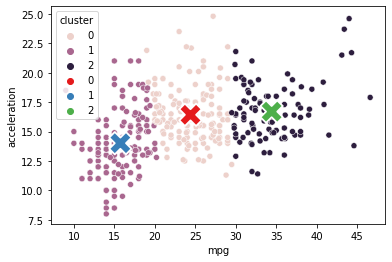

In [11]:
sns.scatterplot(x='mpg',y='acceleration',data=df, hue=model.labels_)
dfsel=explanatory.copy()
dfsel['cluster'] = grupos
centroides = dfsel.groupby('cluster').mean().reset_index()
sns.scatterplot(x='mpg',y='acceleration',data=centroides, hue='cluster', palette='Set1', s=500, marker='X')

In [14]:
import matplotlib.pyplot as plt

(0.0, 50.0)

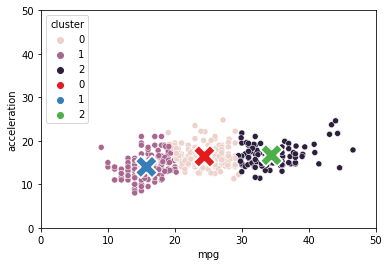

In [15]:
sns.scatterplot(x='mpg',y='acceleration',data=df, hue=model.labels_)
dfsel=explanatory.copy()
dfsel['cluster'] = grupos
centroides = dfsel.groupby('cluster').mean().reset_index()
sns.scatterplot(x='mpg',y='acceleration',data=centroides, hue='cluster', palette='Set1', s=500, marker='X')
plt.xlim(0, 50)
plt.ylim(0, 50)

# Interpretar Modelo

> 1. Si tuvieras que ponerle nombre a cada grupo, ¿cuál le darías?
> 2. ¿En qué te basas para ello?

In [12]:
# Nombre en funcion de mpg (de menor consumo a mayor)

# Objetivos Alcanzados

_Haz doble click sobre esta celda y pon una `X` dentro de las casillas [X] si crees que has superado los objetivos:_

- [ ] Entender **cómo la máquina optimiza un modelo**, que no es más que encontrar **los números** una ecuación matemática.
- [ ] La importancia de la **Suma de Cuadrados** como concepto fundamental de la estadística para medir el **error**.
- [ ] Entender la necesidad de **Normalizar** los datos al emplear un algoritmo que involucra el **cálculo de distancias**.
- [ ] Entender que la estadística no es más que una forma de aproximarse a la realidad. Y esta aproximación no es una ciencia exacta, sino **subjetiva**.
- [ ] Empezar a distinguir, más aún, que la programación es una herramienta hacia un fin.
- [ ] Al principio, nos salen muchos errores programando y creemos que no valemos para esto. Sin embargo, en este momento del programa, veremos que existen unos **patrones que siempre se cumplen en los errores** y empezaremos a **entender la máquina**.
- [ ] Una vez más, nos daremos cuenta de que existen **distintos modelos para realizar el Análisis de Cluster**. De la misma manera que en el anterior capítulo también existían diversos Modelos de Regresión.